In [1]:
import pathlib as pl
import datetime as dt
import pandas as pd
# Costume imports
from modules import dynamicclass
from modules import filehandling

## Setup

In [2]:
User = dynamicclass.create_user()       # Create user from user_data file
filehandling.scrapandmove()             # Update data from stromnetzgraz website

# Create dataframes with all data
df_day = filehandling.create_dataframe(User.csv_wd_daysum, User.day_meter)
df_night = filehandling.create_dataframe(User.csv_wd_daysum, User.night_meter)

Most recent data already downloaded


## Analysis

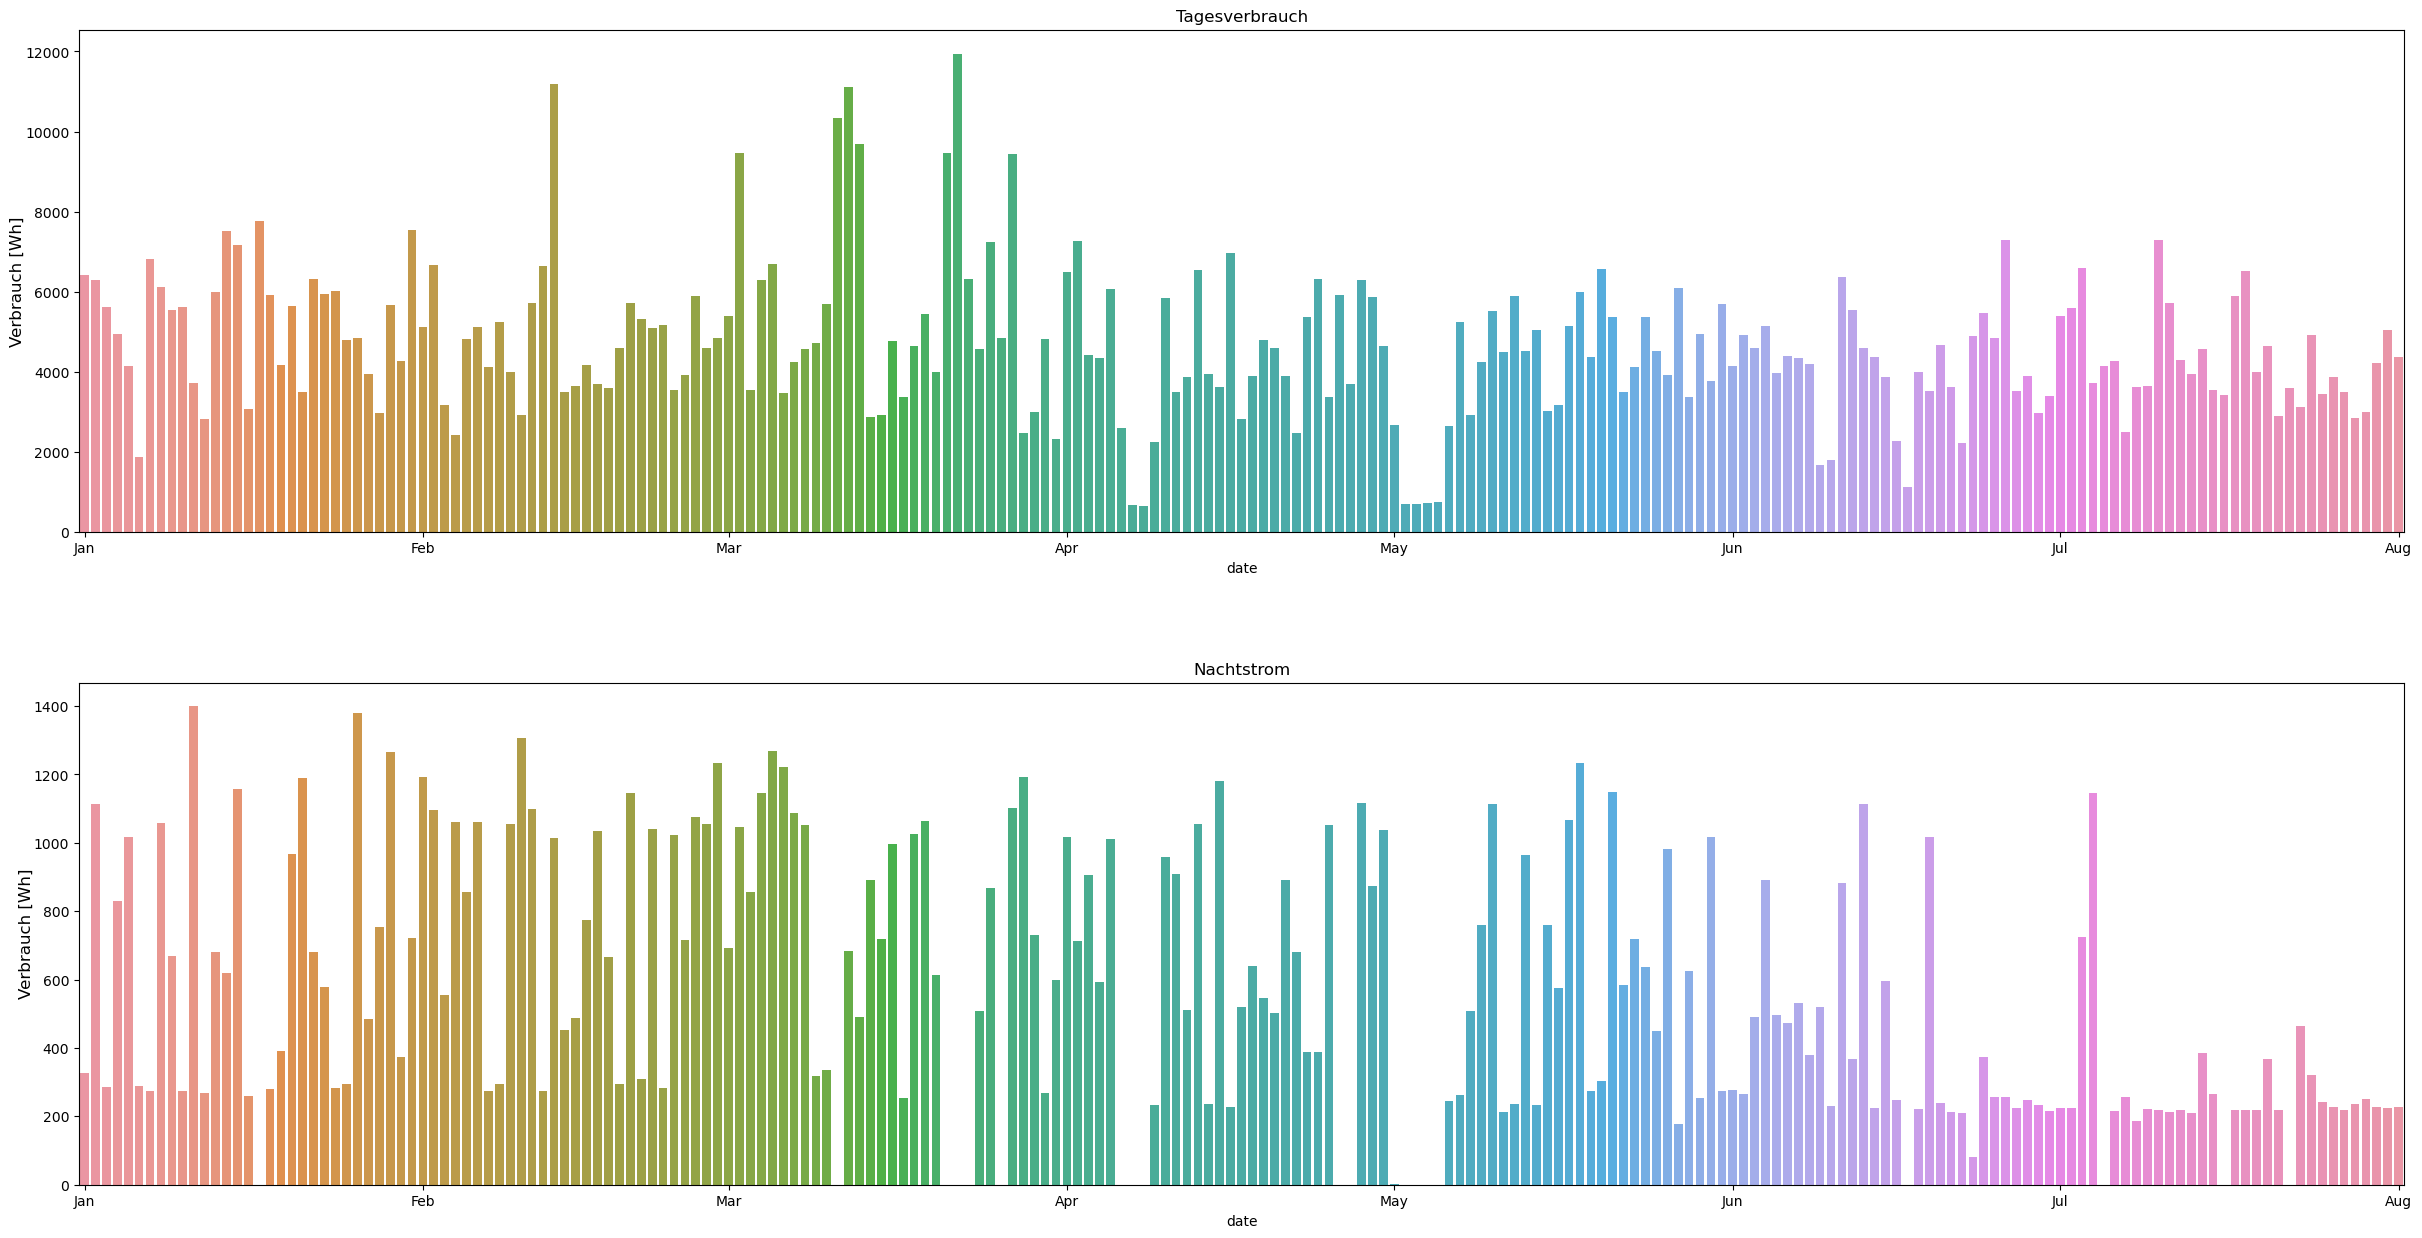

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize =([30, 15]))

# Gridspec Setup
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 0])
gs.update(wspace = 0.1, hspace = 0.3)

### AX1 ###
ax1 = plt.subplot(gs[0, :2])
sns.barplot(data=df_day,
            x='date',
            y='verbrauch')
ax1.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax1.xaxis.set_major_locator(md.MonthLocator())
ax1.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax1.set_title('Tagesverbrauch')

### AX2 ###
ax2 = plt.subplot(gs[1, :2])
sns.barplot(data=df_night,
            x='date',
            y='verbrauch')
ax2.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax2.set_title('Nachtstrom')

### Draw Plot ###
plt.show()